<a href="https://colab.research.google.com/github/Visionary-DataWorks/DSPL-Project/blob/main/Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
file_path = '/content/cleaned_train_data.csv'
df_cleaned = pd.read_csv(file_path)

In [3]:
# Display the first few rows
print(df_cleaned.head())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_category  city_encoded  
0                 4            11  
1                 1            13  
2                 4            19  
3                 4            19  
4                 4            11  


In [4]:
# Check the rows and columns
print(df_cleaned.shape)

(774148, 7)


### Check and prepare Features and Target

In [5]:
# Define Features (x) and Target (y)
x = df_cleaned[['outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales']]
y = df_cleaned['cluster_category'] # Target Variable
print('Features shape:', x.shape)
print('Target shape:', y.shape)

Features shape: (774148, 4)
Target shape: (774148,)


### Encode categorical variable

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for outlet city
le = LabelEncoder()
x['outlet_city'] = le.fit_transform(x['outlet_city'])

<ipython-input-6-eae6d4650d2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['outlet_city'] = le.fit_transform(x['outlet_city'])


In [7]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

print('Training set shape:', x_train.shape)
print('Testing set shape:', x_test.shape)

Training set shape: (619318, 4)
Testing set shape: (154830, 4)


### Train the Decision Tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree classifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dtree.fit(x_train, y_train)

print('\nModel trained successfully')


Model trained successfully


### Make predictions and evaluate the model

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = dtree.predict(x_test)

# Evaluate the model
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9311180003875218

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.96      0.95     37797
           2       0.95      0.95      0.95     31013
           3       0.78      0.86      0.81      9781
           4       0.96      0.94      0.95     34488
           5       0.80      0.70      0.75      7908
           6       0.95      0.95      0.95     33843

    accuracy                           0.93    154830
   macro avg       0.90      0.89      0.89    154830
weighted avg       0.93      0.93      0.93    154830


Confusion Matrix:
 [[36293     2    68  1433     1     0]
 [    0 29331     3     1     2  1676]
 [    1     0  8377     1  1402     0]
 [ 2183     0     2 32300     3     0]
 [    2     1  2331     1  5572     1]
 [    0  1544     2     2     3 32292]]


In [10]:
# Display feature importance
print('\nFeature Importance:')
feature_importance = pd.Series(dtree.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importance)


Feature Importance:
dry_sales       0.473502
luxury_sales    0.252452
fresh_sales     0.241901
outlet_city     0.032144
dtype: float64


### Visualize the Decision Tree

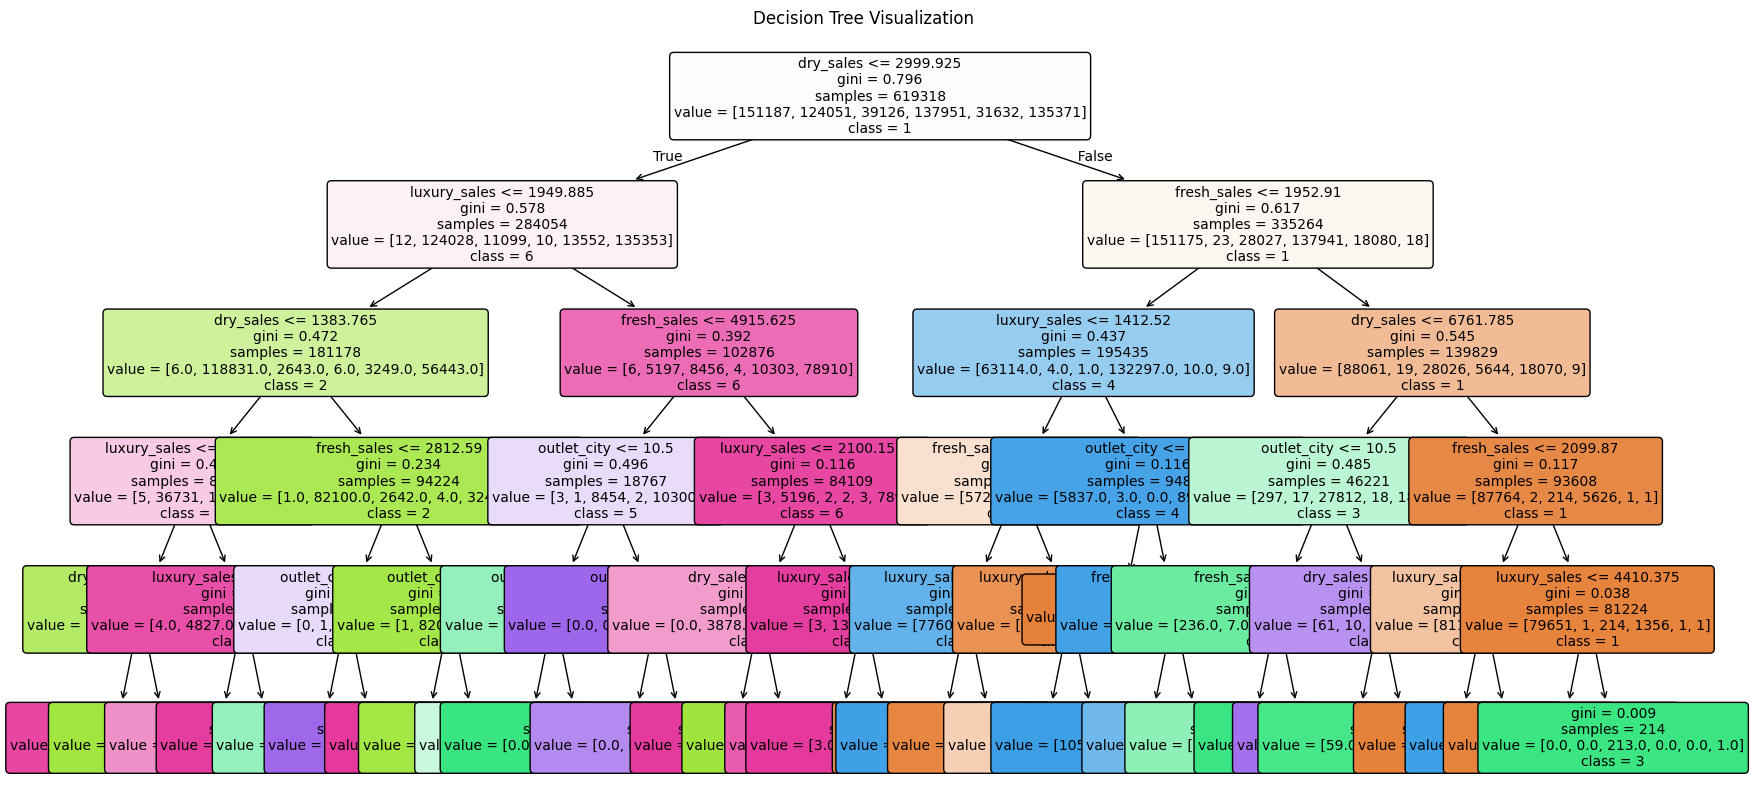

In [12]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dtree, feature_names=x.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()